# **PROJET DEEP LEARNING : La segmentation d'images**

*Présenté par :*

- Clément CONTAMIN
- Célian TOULON
- Thomas USIMAKI

## Sources :


https://larevueia.fr/quest-ce-que-la-segmentation-dimages/ Introduction à la segmentation d'images

https://cnvrg.io/image-segmentation/ Code (avec quelques coquilles que nous avons modifié)

http://morpheo.inrialpes.fr/people/Boyer/Teaching/M2PGI/c3.pdf Filtres de convolutions d'images

http://www.optique-ingenieur.org/fr/cours/OPI_fr_M04_C05/co/Contenu_08.html Opérateurs de Laplace

https://devmath.fr/informatique/seuillage-dimage-en-python/ Fonction seuillage

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwih0I2pleP9AhUEUKQEHUZ7A9MQFnoECAwQAQ&url=https%3A%2F%2Fwww.atlantis-press.com%2Farticle%2F25839570.pdf&usg=AOvVaw1b0oZEY8KIFm8FWe_Y6kPv 
"A method to improve robustness of the grey world algorithm"

https://www.tensorflow.org/tutorials/images/segmentation?hl=fr Code de la méthode U-Net

## Bibliothèques Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2 # Bibliothèque utilisée dans le traitement d'images 
from skimage.color import rgb2gray
from scipy import ndimage

In [2]:
from google.colab import files
from IPython.display import Image
# Ces deux lignes de code nous permettent d'importer des images sur google colab

## Importations d'images

In [3]:
uploaded = files.upload() # Image exemple segmentation

Saving segmentation_exemple.png to segmentation_exemple.png


In [4]:
uploaded = files.upload() # Image 2 perroquets

Saving parrots_orig.png to parrots_orig.png


In [5]:
uploaded = files.upload() # Image perroquet seul

Saving perroquet.jpg to perroquet.jpg


In [6]:
uploaded = files.upload() # Image filtres convolutifs

Saving Filtres.jpg to Filtres.jpg


In [7]:
uploaded = files.upload()

Saving a.png to a.png


In [8]:
uploaded = files.upload()

Saving b.png to b.png


In [9]:
uploaded = files.upload()

Saving c.png to c.png


In [10]:
uploaded = files.upload() # Modèle U-Net

Saving U-Net.png to U-Net.png


## Introduction

La segmentation d’images est une technique de computer vision (intelligence artificielle permettant d'analyser puis interpréter une image ou vidéo) qui consiste à découper de façon automatique une image en zones de pixels appartenants à une même classe d’objets. La segmentation d’images possède de nombreuses applications que nous verrons par la suite.

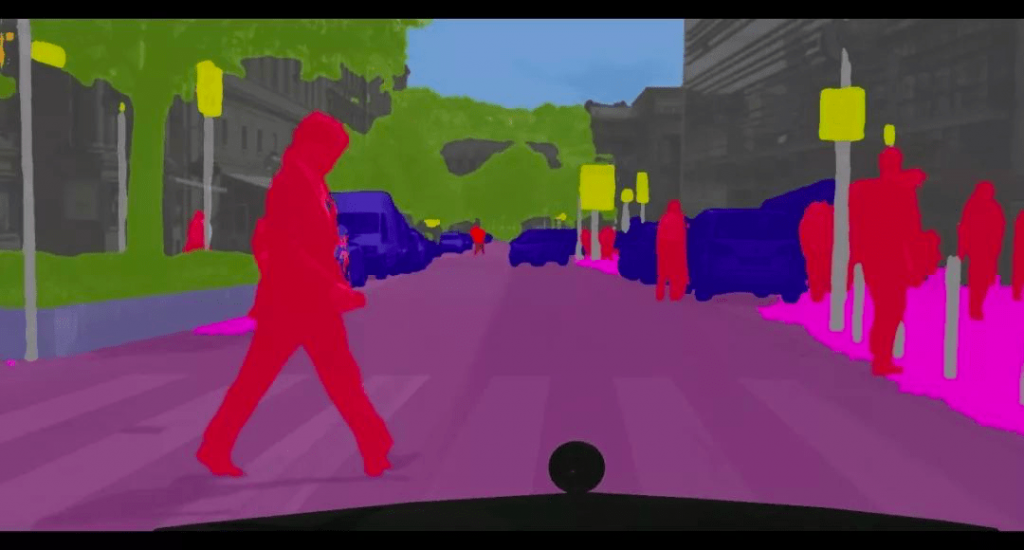

In [11]:
Image("segmentation_exemple.png", width=500)

Ce procédé peut être utilisé pour la détection d’objets ou de contours, et permet d’avoir une compréhension plus fine des images et des objets qui la constituent.

L’un des domaines qui utilise le plus la segmentation d’images est l’imagerie médicale, où elle permet de découper les illustrations en zones pour compter des cellules et détecter des changements ou des anomalies. Cette supervision des images permet de diagnostiquer des maladies comme le cancer ou encore de réaliser des calculs d’âges osseux

La segmentation d’images est également très utilisée pour l’analyse d’images satellitaires puisque des modèles de segmentation permettent de détecter les routes, les bâtiments ou les champs.

Dans ce projet, nous allons utiliser des images d'animaux et notamment des perroquets pour commencer. En effet, leur robe offrant des couleurs vives et variées nous permettront de discerner plus facilement les changements de couleurs.

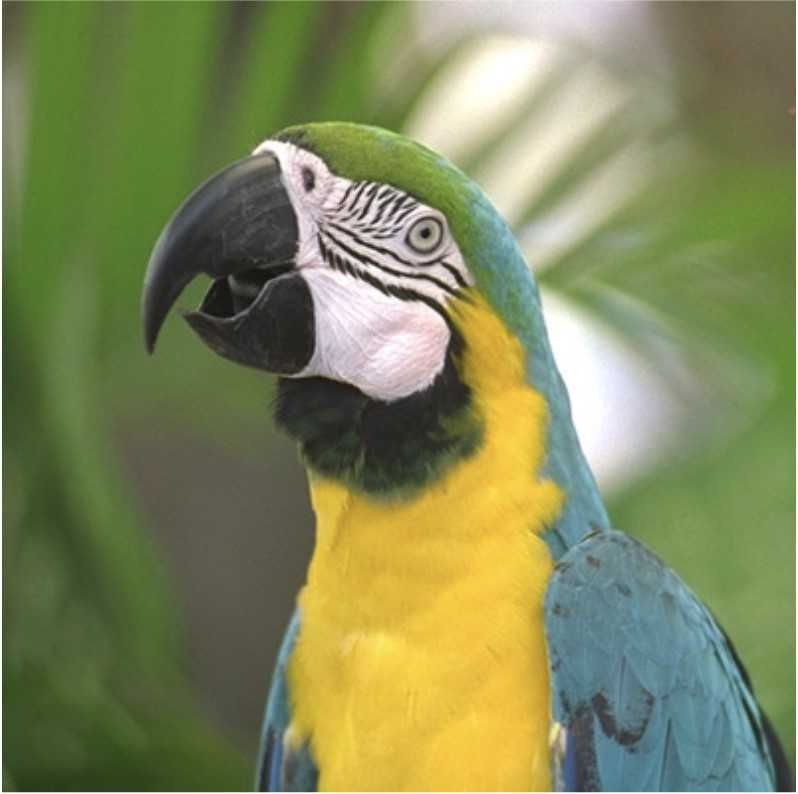

In [12]:
Image("perroquet.jpg", width=500)

## Segmentation par détection de contours sans filtre

Avec la segmentation par détection de contours sans aucun filtre, ici, notre but sera de reproduire une image en noir et blanc puis de réaliser l'opération suivante sur chaque pixel de l'image :

- Si un pixel a une valeur supérieure à la moyenne des pixels de l'image, alors il prendra la valeur 1 (il sera donc blanc par renormalisation de l'image).

- Si un pixel a une valeur inférieure ou égale à la moyenne des pixels de l'image, alors il prendra la valeur 0 (il sera alors noir par renormalisation de l'image).

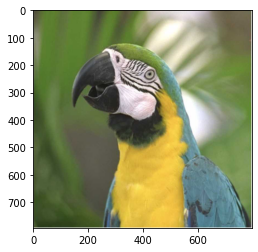

In [13]:
image = plt.imread("perroquet.jpg")
plt.imshow(image)

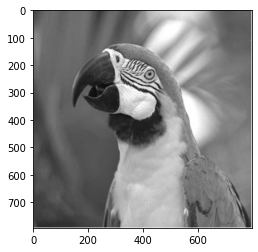

In [14]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

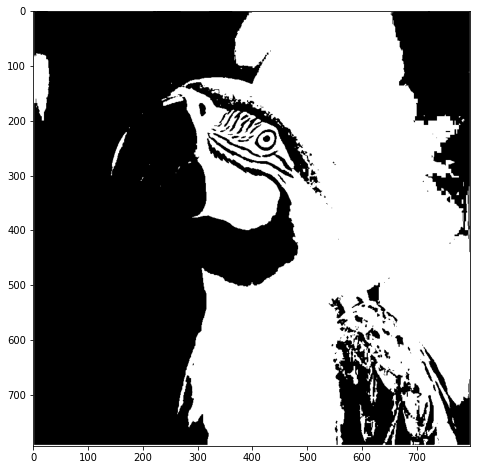

In [15]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray2 = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.figure(figsize=(10, 8))
plt.imshow(gray2, cmap='gray')

Bien que cette méthode soit la plus simple, elle est également la plus longue et la moins efficace pour segmenter des images puisqu'elle donne des résultats non satisfaisants, qui de plus se font sur des images en noir et blanc.

## Segmentation par détection de contours avec filtres passe-haut

### Segmentation par filtre de Laplace

Plusieurs filtres de Laplace existent afin de modifier des images, en effet, nous pouvons choisir d'utiliser le masque de Laplace en connexité 4 ou en connexité 8

In [16]:
# Masque de Laplace en connexité 4 :
laplace4 = 1/4 * np.array([np.array([0,-1,0]), np.array([-1,4,-1]), np.array([0,-1,0])])

In [17]:
out_laplace4 = ndimage.convolve(gray, laplace4, mode = 'reflect')

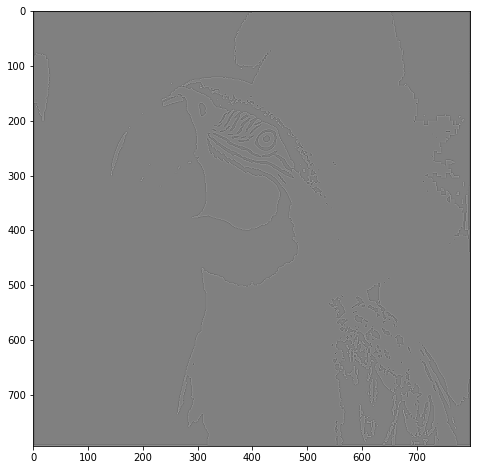

In [18]:
plt.figure(figsize=(10, 8))
plt.imshow(out_laplace4, cmap='gray')

La segmentation du perroquet apparaît mais nous ne la percevons pas très bien.
Essayons donc de modifier chaque pixel de l'image afin de mieux le remarquer.

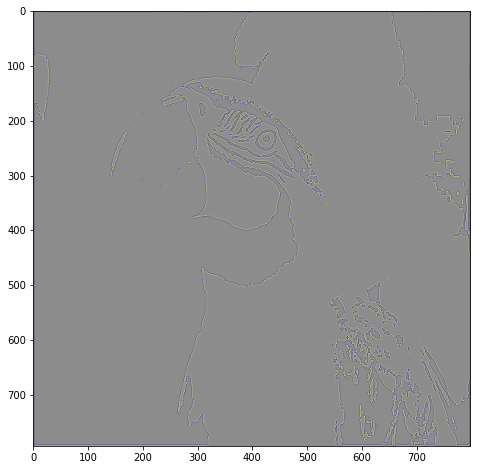

In [19]:
a,b = out_laplace4.shape
thelaplace4 = np.zeros((a,b,3))
for i in range(2):
  thelaplace4[:,:,i] = out_laplace4
thelaplace4 = thelaplace4 + 0.55 # On renormalise l'image pour mieux faire apparaître les traits de couleur blanche.
plt.figure(figsize=(10, 8))
plt.imshow(thelaplace4, cmap='gray')

Essayons maintenant avec le masque de connexité 8 de Laplace

In [20]:
# Masque de Laplace en connexité 8 :
laplace8 = 1/8 * np.array([np.array([-1,-1,-1]), np.array([-1,8,-1]), np.array([-1,-1,-1])])

In [21]:
out_laplace8 = ndimage.convolve(gray, laplace8, mode='reflect')

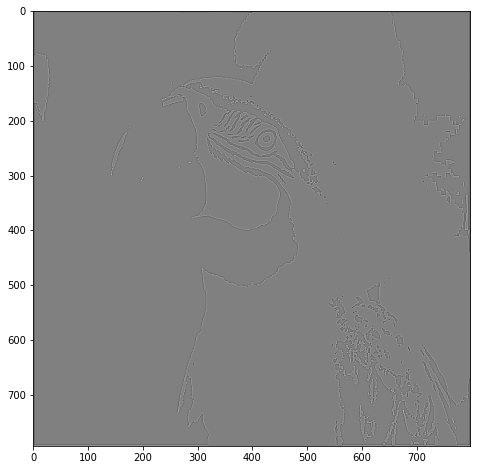

In [22]:
plt.figure(figsize=(10, 8))
plt.imshow(out_laplace8, cmap='gray')

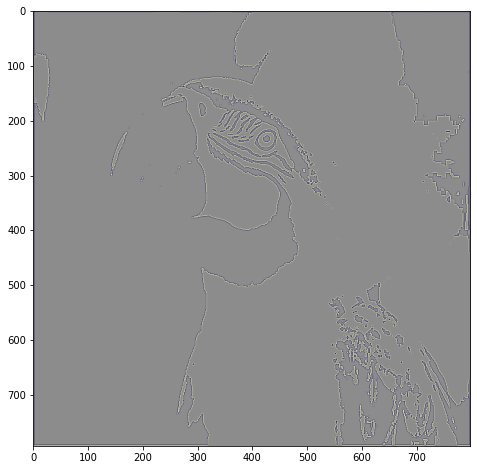

In [23]:
c,d = out_laplace8.shape
thelaplace8 = np.zeros((c,d,3))
for i in range(2):
  thelaplace8[:,:,i] = out_laplace8
thelaplace8 = thelaplace8 + 0.55 # On renormalise l'image afin de mieux la percevoir
plt.figure(figsize=(10, 8))
plt.imshow(thelaplace8, cmap='gray')

Bien que le filtre de convolution de Laplace de connexité 8 soit à priori plus efficace que le filtre de Laplace de connexité 4, lorsque l'on convolue ces filtres avec une image quelconque, le résultat n'est pas convainquant.

Cependant, quand on remplace la valeur du centre du masque par son opposé, on perçoit mieux le perroquet puisque l'on constate que nous retrouvons le même résultat que pour la segmentation par contours sans filtre.

In [24]:
# Masque de Laplace en connexité 4 modifié :
laplace4bis = np.array([np.array([0,1,0]), np.array([1,4,1]), np.array([0,1,0])])

In [25]:
out_laplace4bis = ndimage.convolve(gray, laplace4bis, mode = 'reflect')

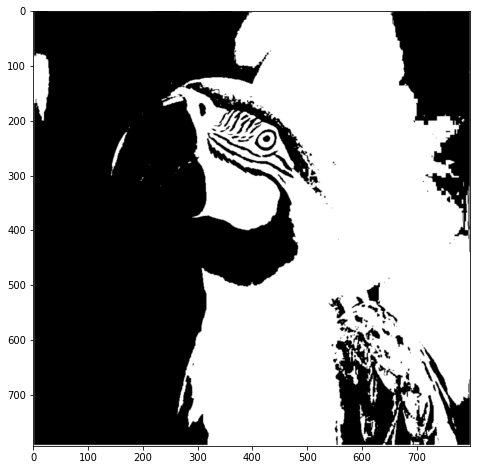

In [26]:
plt.figure(figsize=(10, 8))
plt.imshow(out_laplace4bis, cmap='gray')

In [27]:
# Masque de Laplace en connexité 8 modifié :
laplace8bis = np.array([np.array([1,1,1]), np.array([1,8,1]), np.array([1,1,1])])

In [28]:
out_laplace8bis = ndimage.convolve(gray, laplace8bis, mode = 'reflect')

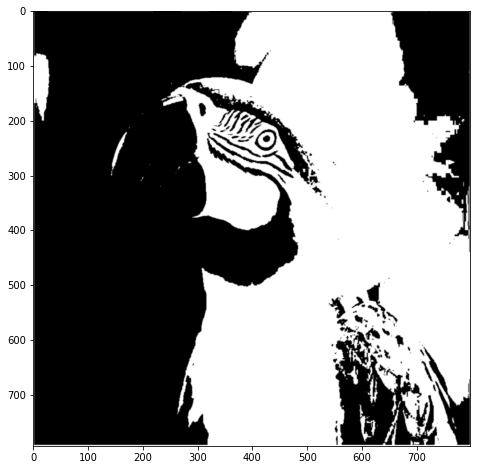

In [29]:
plt.figure(figsize=(10, 8))
plt.imshow(out_laplace8bis, cmap='gray')

Notre filtre de Laplace que nous avons légèrement modifié affiche à priori une illustration très similaire voire identique à notre première méthode de détection de contours sans filtre.

Cependant, les temps d'exécution diffèrent d'au moins 2 minutes, ce qui montre une amélioration de notre toute première méthode.

Dans l'idée d'obtenir des résultats qui différeraient des précédents, essayons cette fois-ci de segmenter notre image d'origine à l'aide d'un autre masque de convolution. On utilisera ainsi le filtre "MDIF"

### Segmentation par filtre MDIF

In [30]:
mdif_horizontal = 1/12 * np.array([np.array([0,1,1,1,0]), np.array([1,2,3,2,1]), np.array([0,0,0,0,0]), np.array([-1,-2,-3,-2,-1]), np.array([0,-1,-1,-1,0])])
mdif_vertical = 1/12 * np.array([np.array([0,1,0,-1,0]), np.array([1,2,0,-2,-1]), np.array([1,3,0,-3,-1]), np.array([1,2,0,-2,-1]), np.array([0,1,0,-1,0])])

In [31]:
out_h3 = ndimage.convolve(gray, mdif_horizontal, mode='reflect')
out_v3 = ndimage.convolve(gray, mdif_vertical, mode='reflect')

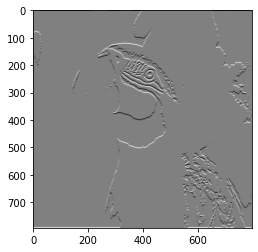

In [32]:
plt.imshow(out_h3, cmap='gray')

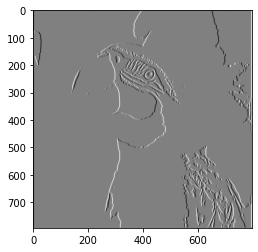

In [33]:
plt.imshow(out_v3, cmap='gray')

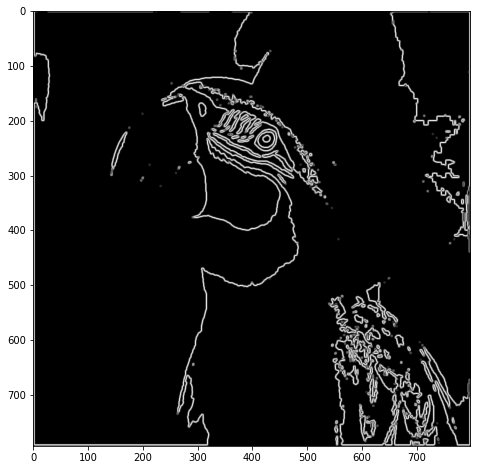

In [34]:
out_mdif = np.sqrt(out_h3**2 + out_v3**2)
plt.figure(figsize=(10, 8))
plt.imshow(out_mdif, cmap='gray')

### Segmentation par filtres de Prewitt et de Sobel

Plusiuers masques de convolutions existent tels que le filtre de Prewitt ou encore le filtre de Sobel existent dans le but de segmenter des images.

Ces deux méthodes différentes fonctionnent de la même manière puisque leur principe est de construire 2 matrices de filtres horizontaux et verticaux que l'on va ensuite convoluer avec notre image d'origine.

Par ailleurs, on remarque que les matrices des filtres de Prewitt et de Sobel sont presque identiques comme on peut le voir sur l'image suivante :

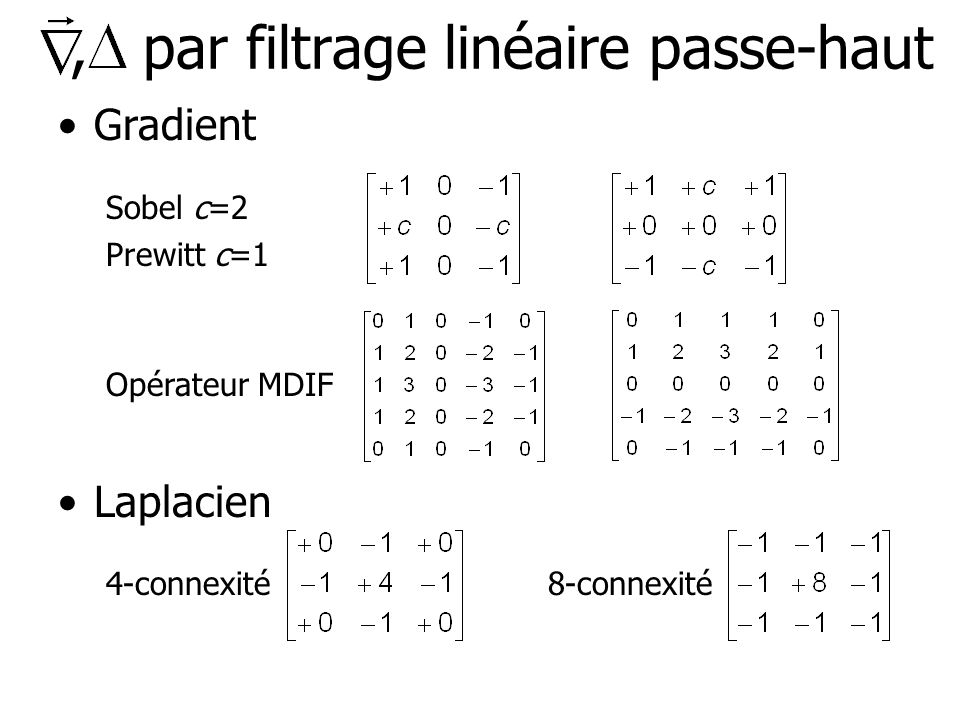

In [35]:
Image("Filtres.jpg", width=500)

Començons par utiliser le filtre de Prewitt :

In [36]:
c = 1
prewitt_horizontal = 1/3 * np.array([np.array([1, c, 1]), np.array([0, 0, 0]), np.array([-1, -c, -1])])
prewitt_vertical = 1/3 * np.array([np.array([-1, 0, 1]), np.array([-c, 0, c]), np.array([-1, 0, 1])])

In [37]:
out_h1 = ndimage.convolve(gray, prewitt_horizontal, mode='reflect')
out_v1 = ndimage.convolve(gray, prewitt_vertical, mode='reflect')

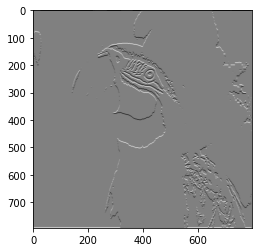

In [38]:
plt.imshow(out_h1, cmap='gray')

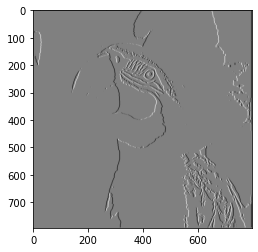

In [39]:
plt.imshow(out_v1, cmap='gray')

On réalise enfin la norme des deux filtres horizontaux et verticaux obtenus pour obtenir notre segmentation finale à l'aide du filtre de Prewitt

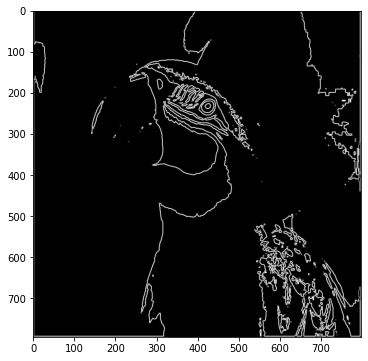

In [40]:
out_prewitt = np.sqrt(out_h1**2 + out_v1**2)
plt.figure(figsize=(8, 6))
plt.imshow(out_prewitt, cmap='gray')

Le principe pour la segmentation par filtre de Sobel est identique au précédent

In [41]:
c = 2
sobel_horizontal = 1/4 * np.array([np.array([1, c, 1]), np.array([0, 0, 0]), np.array([-1, -c, -1])])
sobel_vertical = 1/4 * np.array([np.array([-1, 0, 1]), np.array([-c, 0, c]), np.array([-1, 0, 1])])

In [42]:
out_h2 = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v2 = ndimage.convolve(gray, sobel_vertical, mode='reflect')

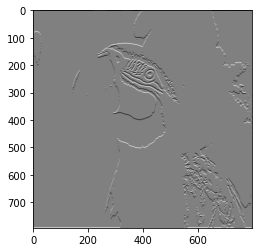

In [43]:
plt.imshow(out_h2, cmap='gray')

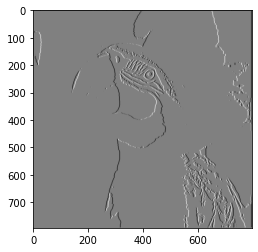

In [44]:
plt.imshow(out_v2, cmap='gray')

On réalise la norme des deux filtres horizontaux et verticaux obtenus pour obtenir notre segmentation finale à l'aide du filtre de Sobel

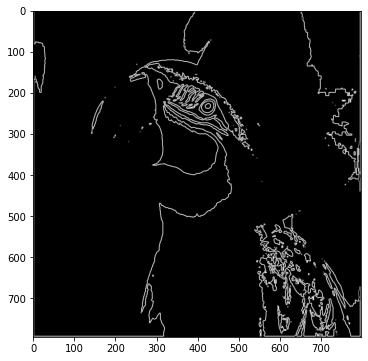

In [45]:
out_sobel = np.sqrt(out_h2**2 + out_v2**2)
plt.figure(figsize=(8, 6))
plt.imshow(out_sobel, cmap='gray')

Les résultats précédents étant relativement identiques et seulement traitables sur des images en noir et blanc, nous allons par la suite essayer des techniques plus sophistiquées telles que la segmentation par seuillage.

## Segmentation par seuillage

In [46]:
from PIL import Image # Bibliothèque utilisée pour notre fonction "Seuillage" dans les filtres de convolution de Laplace

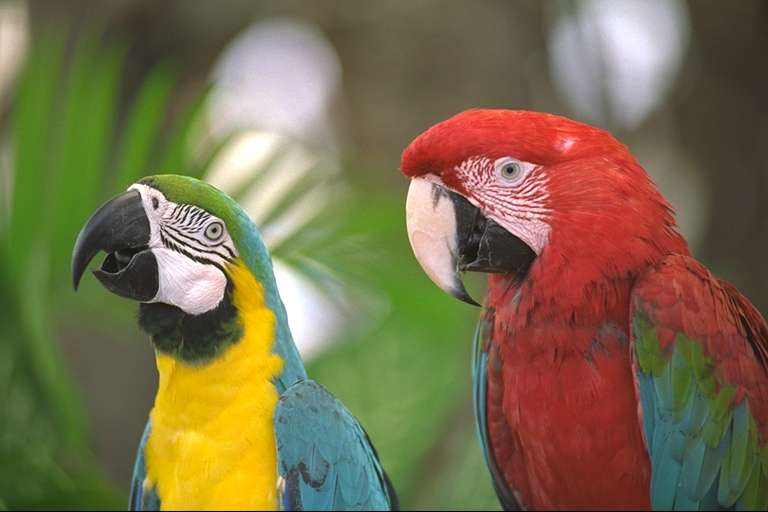

In [47]:
image = Image.open("parrots_orig.png")
np_array = np.array(image)
pil_image=Image.fromarray(np_array)
pil_image.show()

On définit la fonction "Seuillage" ci-dessous :

In [48]:
def Seuillage(Img:Image, s:int)->Image:
  newImg = np.copy(Img)
  for i in range(len(newImg)):
    for j in range(len(newImg[0])):
      x = newImg[i,j,0]
      y = newImg[i,j,1]
      z = newImg[i,j,2]

      if x < s or y < s or z < s : 
        newImg[i,j,0:] = 0

      else : 
        newImg[i,j,0:] = 255

  return Image.fromarray(newImg, 'RGB')

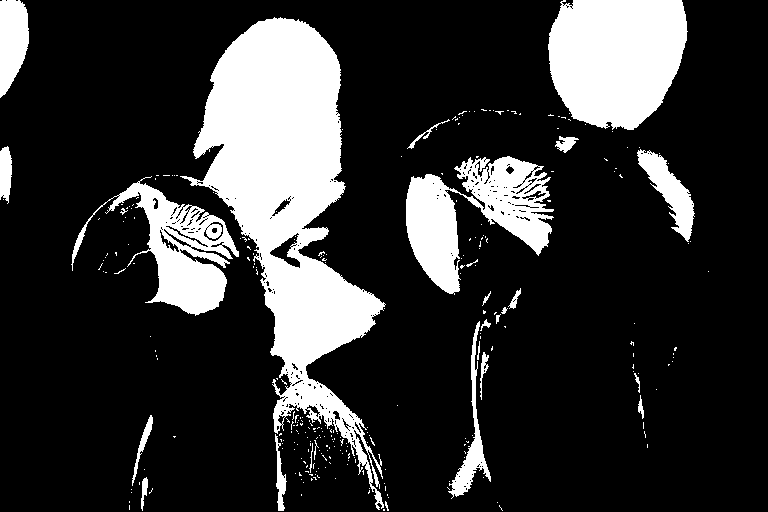

In [49]:
Seuillage(pil_image, 90)

Cette fois-ci, le résultat est nettement plus convainquant mais nous obtenons toujours un résultat en noir et blanc. Essayons donc désormais d'utiliser des algorithmes de machine learning afin de segmenter des images à travers d'autres méthodes telles que les K-Nearest-Neighbours :

## Segmentation basée sur le clustering

In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

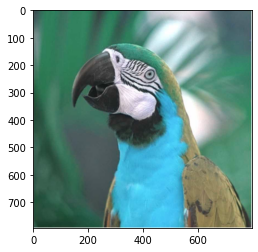

In [51]:
original_image = cv2.imread("perroquet.jpg")
plt.imshow(original_image) # A enlever

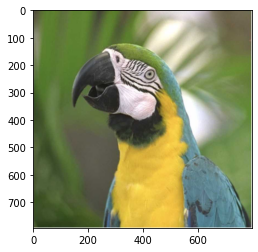

In [52]:
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [53]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

In [54]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3 # Nombre de couleurs différentes de l'image finale
attempts = 10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [55]:
center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape((img.shape))

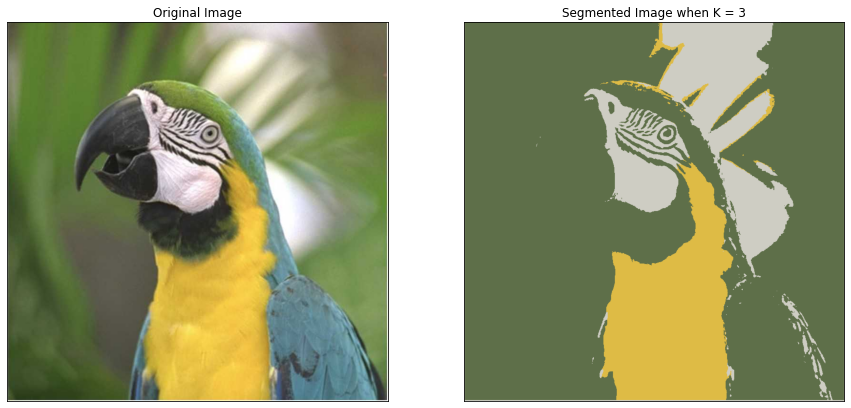

In [56]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

Le résultat n'est pas très convainquant, en effet, nous ne percevons point le bec du volatile. Essayons donc de faire varier l'hyperparamètre "Nombre de voisins" en l'augmentant légèrement.

In [57]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 6
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [58]:
center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape((img.shape))

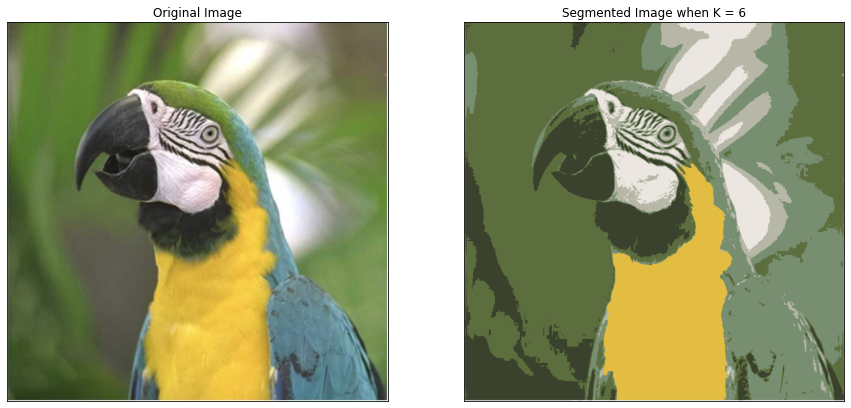

In [59]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

On voit bien ici tous les détails du perroquet

Nous avons segmenté les images grâce à différentes techniques. On pourrait donc se demander pourquoi on s'intéresse à la segmentation et quelles en sont les potentielles applications. 

Une première réponse à la question serait que nous utilisons la segmentation pour le traitement d'images. Nous allons donner un exemple d'application que nous avons trouvé dans le papier de recherche "A method to improve robustness of the grey world algorithm".

En résumé, le "grey world algorithm" est un algorithme de balance de couleurs d'une illustration. L'idée de cette méthode est qu'étant donné une image avec une bonne distribution des couleurs, la moyenne des nuances de la figure correspond à la couleur de la source lumineuse. En comparant la couleur déterminée par l'algorithme au gris, ce programme permet d'ajuster les couleurs de l'image afin d'obtenir une représentation ayant l'air naturelle.

Cette méthode est utilisée notamment par les appareils photos pour la balance des couleurs. Cependant l'algorithme présente des limitations car il suppose qu'il y a une bonne distribution des couleurs dans l'image, ce qui n'est pas toujours le cas. Dépendant de la scène photographiée, certaines couleurs peuvent être prédominantes et d'autres peu présentes.

Le papier de recherche "A method to improve robustness of the grey world algorithm" cherche à rendre l'algorithme plus robuste en utilisant la segmentation des images. L'idée est de segmenter l'image avec Sobel, de fermer les contours détectés et d'attribuer un poids petit aux grandes sections de l'image et un poids grand aux petites sections, puis de lancer the grey world algorithm en tenant compte des poids de chaque section afin de balancer les couleurs primordiales de chaque section et obtenir une meilleure prédiction de la couleur de la source lumineuse.
Ci-dessous un exemple montrant la méthode propose dans le papier de recherche.






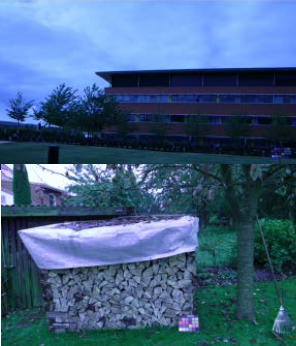

In [62]:
# original photo
image = Image.open("a.png")
np_array = np.array(image)
pil_image=Image.fromarray(np_array)
pil_image.show()

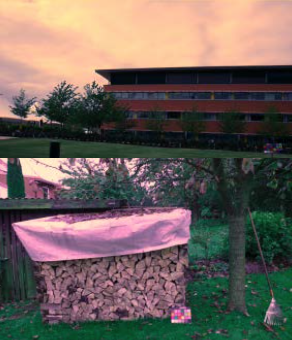

In [63]:
# grey world algorithm applied
image = Image.open("b.png")
np_array = np.array(image)
pil_image=Image.fromarray(np_array)
pil_image.show()

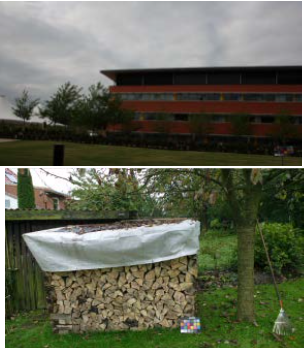

In [64]:
#improved grey world algorithm applied 
image = Image.open("c.png")
np_array = np.array(image)
pil_image=Image.fromarray(np_array)
pil_image.show()

On observe que la troisième photo, qui provient de l'algorithme proposé dans l'article, contient des couleurs plus naturelles que les deux autres images. L'article va plus en détail sur comment la qualité des couleurs est evaluée scientifiquement.



On pourrait toutefois se demander si il n'existe point de meilleure méthode pour segmenter des images.

Grace à l'utilisation du Deep Learning et de reseaux de neurones, nous sommes capables de segmenter des images à l'aide d'une base de données d'entraînement.

Dans la partie suivante nous expliquerons comment procéder en détail.

## Segmentation via le modèle U-Net

Ici, nous allons commencer à rentrer dans le domaine du deep learning puisque U-Net est un processus nous permettant de réaliser une segmentation d'image basée sur des réseaux de  neurones.

Son nom provient de son schéma de conception qui ressemble à un "U"

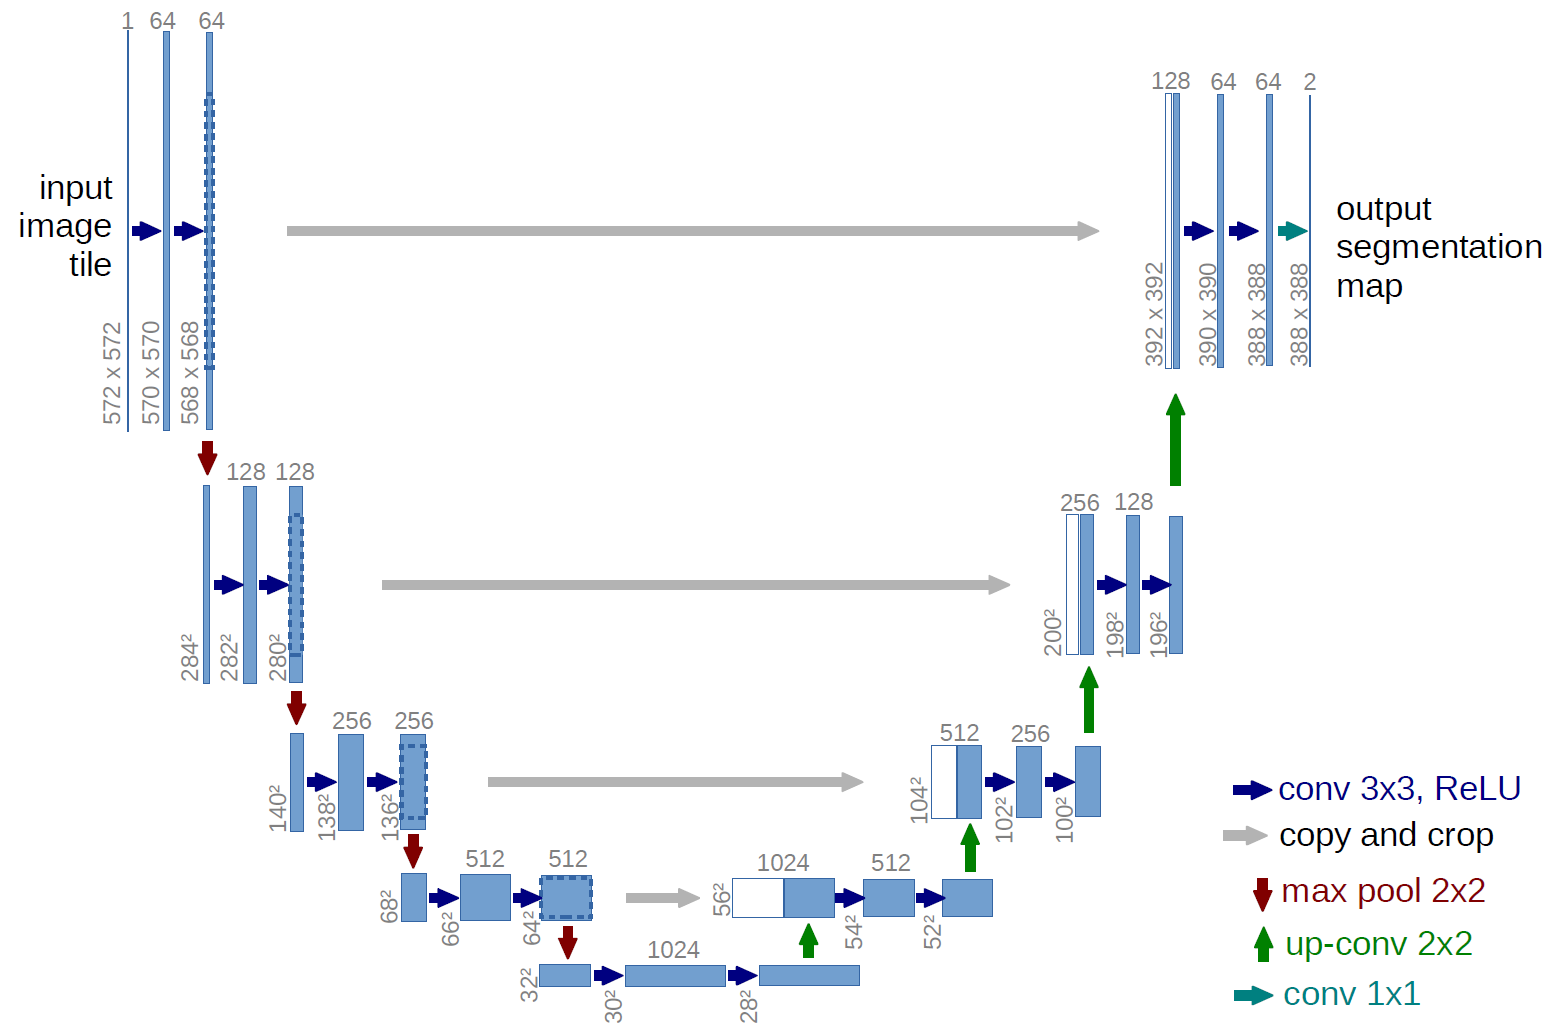

In [65]:
 Image.open("U-Net.png")

Dans une tâche de classification d'images, le réseau attribue une étiquette (ou classe) à chaque image d'entrée. Cependant, supposons que nous voulons connaître la forme de cet objet, on peut attribuer une classe à chaque pixel de l'image. Cette tâche est connue sous le nom de segmentation. Un modèle de segmentation renvoie des informations beaucoup plus détaillées sur l'image.

Afin de réaliser notre segmentation par le biais de ce modèle, nous allons avoir besoin d'un certain nombre d'images pour entraîner notre réseau de neurones. Pour cela, nous allons utiliser un ensemble d'images d'animaux domestiques provenant de l'université d'Oxford sur GitHub

En effet, nous utilisons l'ensemble de données Oxford-IIIT Pet (Parkhi et al, 2012). Cet ensemble de données se compose d'images de 37 races d'animaux de compagnie, avec 200 images par race. Chaque image comprend les étiquettes correspondantes et les masques pixel par pixel.

In [66]:
pip install -q git+https://github.com/tensorflow/examples.git

  Preparing metadata (setup.py) ... done
  Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https://github.com/pypa/pip/issues/8368


In [67]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow_examples.models.pix2pix import pix2pix

from IPython.display import clear_output
import matplotlib.pyplot as plt

In [68]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)
dataset

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteP56T99/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteP56T99/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


{'train': <PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 'test': <PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [69]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

In [70]:
def load_image(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [71]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [72]:
train_images = dataset['train'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
test_images = dataset['test'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

In [73]:
class Augment(tf.keras.layers.Layer):
  def __init__(self, seed=42):
    super().__init__()
    # both use the same seed, so they'll make the same random changes.
    self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)

  def call(self, inputs, labels):
    inputs = self.augment_inputs(inputs)
    labels = self.augment_labels(labels)
    return inputs, labels

In [116]:
# A recompiler en cas de problème de masque qui s'affiche symétriquement par rapport à l'image originale

train_batches = (
    train_images
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE))

test_batches = test_images.batch(BATCH_SIZE)


In [117]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()


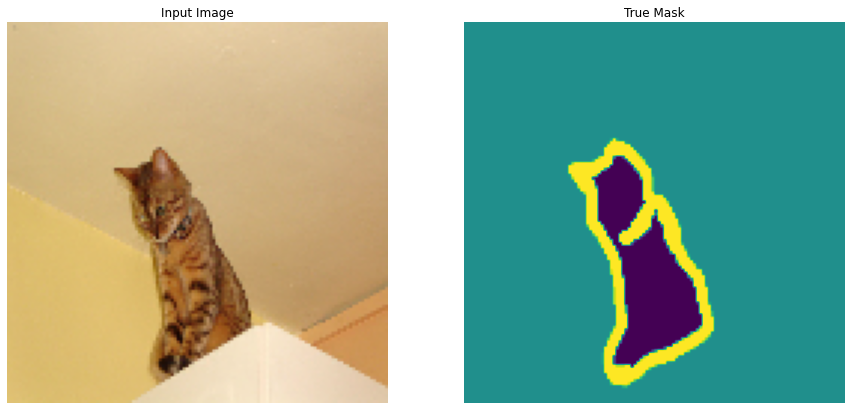

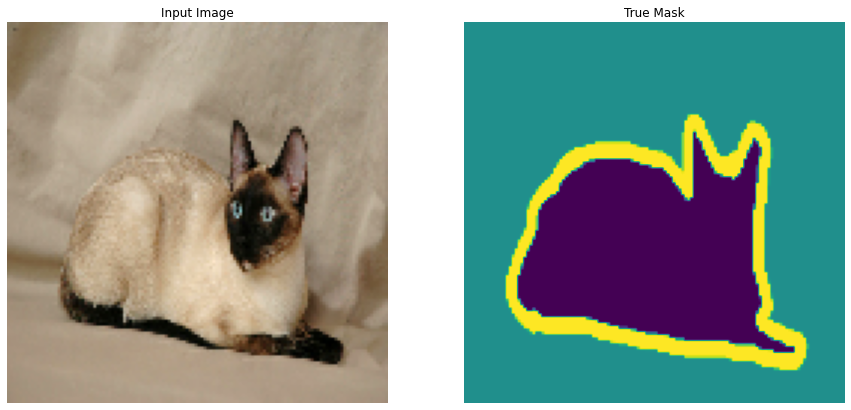

In [139]:
# Ici, on affiche 2 couples aléatoires Image/masque

for images, masks in train_batches.take(2):
  sample_image, sample_mask = images[0], masks[0]
  display([sample_image, sample_mask])

Les masques sont des étiquettes de classe pour chaque pixel. Chaque pixel possède une des trois catégories suivantes :

- Classe 1 (violet) : Pixel appartenant à l'animal.
- Classe 2 (jaune) : Pixel bordant l'animal.
- Classe 3 (bleu vert) : Pixel n'ayant pas de rapport avec l'animal.

#### On définit le modèle

In [140]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False


In [141]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [142]:
def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])

  # On sous-échantillonne notre modèle
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Ici, on sur-échantillonne le modèle et on établit les connexions manquantes
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # Enfin, on code la dernière couche de notre modèle
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)


#### Compilation et conception du modèle :

In [143]:
OUTPUT_CLASSES = 3

model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# On utilise la fonction de perte "tf.keras.losses.SparseCategoricalCrossentropy" avec l'argument "from_logits" défini sur "True".
# En effet, les étiquettes sont ici des entiers scalaires et non des vecteurs de scores pour chaque pixel de chaque classe.

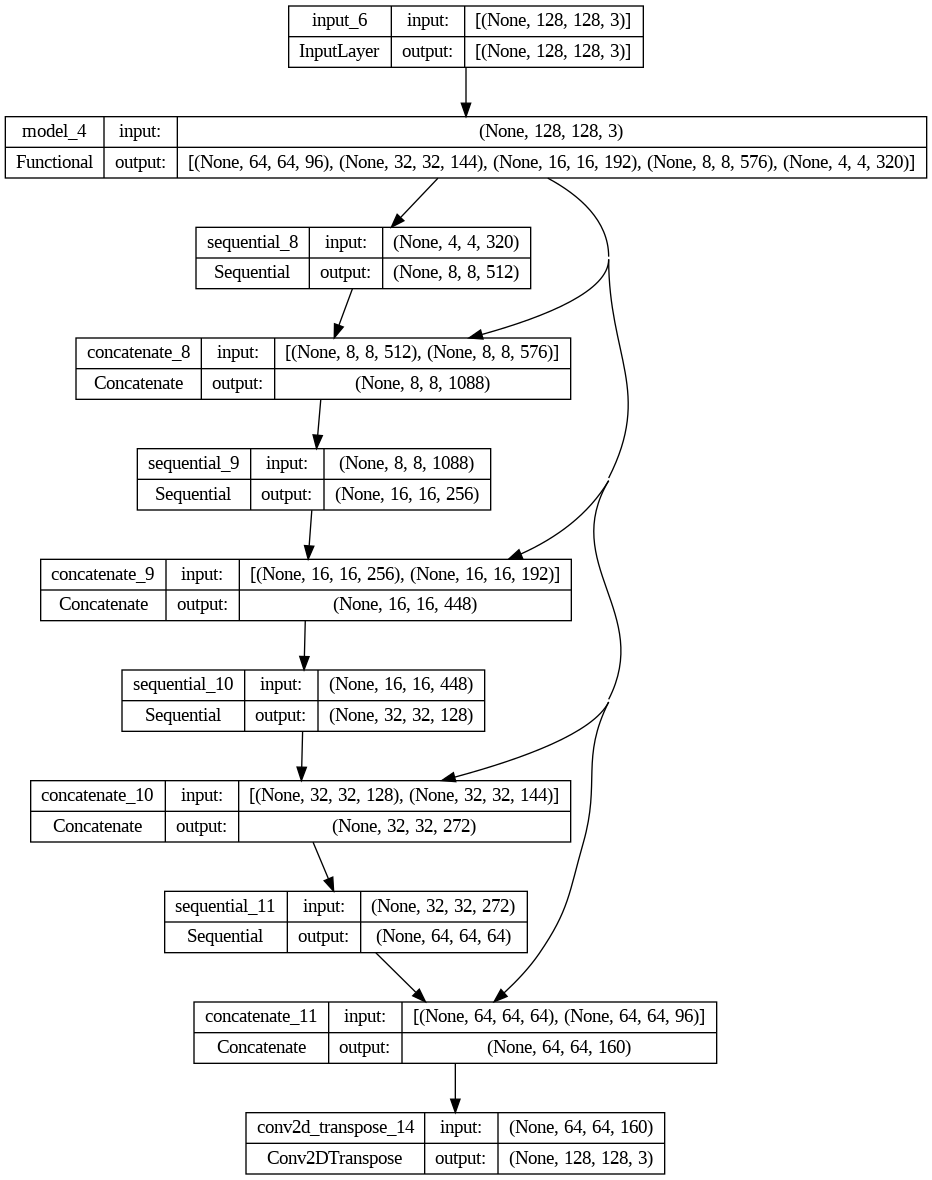

In [144]:
tf.keras.utils.plot_model(model, show_shapes=True) # On affiche l'architecture du modèle

In [145]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

# La fonction "create_mask" retourne l'étiquette attribuée au pixel ayant la valeur la plus élevée.

In [146]:
def show_predictions(dataset=None, num=2):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

1/1 [==============================] - 1s 1s/step


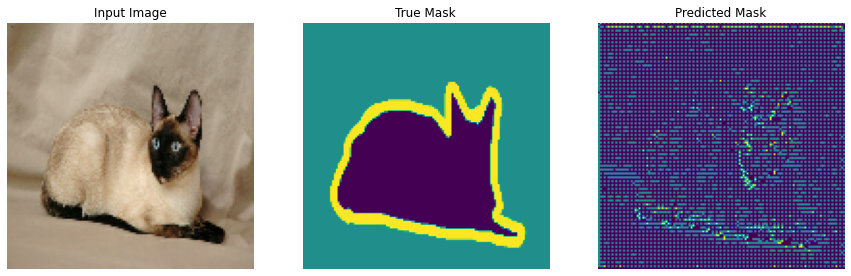

In [147]:
show_predictions()

On affiche ici le masque prédit pour une illustration quelconque sélectionnée aléatoirement dans notre jeu de données.

Le résultat n'est pas très convainquant puisque il nous affiche un masque prédit sans entraînement.

On entraîne ainsi notre modèle en lui concevant un pipeline constitué de 20 épochs

In [148]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

# Cette fonction nous servira dans le bloc de code ci-dessous.
# Elle nous permet de savoir, grâce à une image de base, comment la création de notre masque s'améliore au fur à mesure de la réalisation de nos epochs.


1/1 [==============================] - 0s 79ms/step


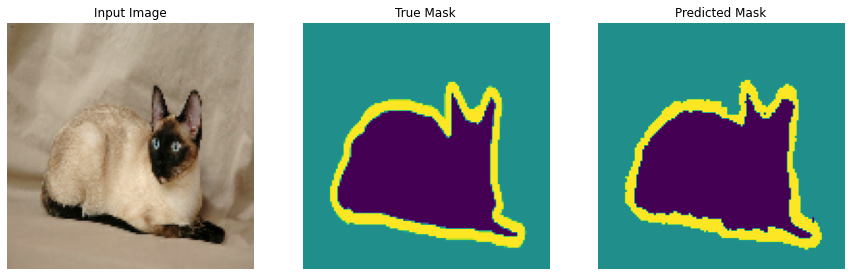


Sample Prediction after epoch 20

57/57 [==============================] - 398s 7s/step - loss: 0.1318 - accuracy: 0.9396 - val_loss: 0.3146 - val_accuracy: 0.8915


In [149]:
# On affiche ici le masque prédit grâce à notre nouveau pipeline auquel nous avons ajouté des epochs 

EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_batches, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_batches,
                          callbacks=[DisplayCallback()])

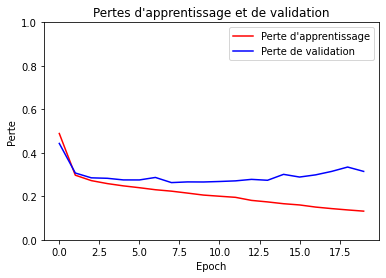

In [150]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure()
plt.plot(model_history.epoch, loss, 'r', label="Perte d'apprentissage")
plt.plot(model_history.epoch, val_loss, 'b', label="Perte de validation")
plt.title("Pertes d'apprentissage et de validation")
plt.xlabel('Epoch')
plt.ylabel('Perte')
plt.ylim([0, 1])
plt.legend()
plt.show()


La perte d'apprentissage est une mesure utilisée pour évaluer la façon dont un modèle d'apprentissage profond s'adapte aux données d'apprentissage. En d'autres termes, elle évalue l'erreur du modèle sur l'ensemble de formation. L'ensemble d'entraînement est une partie d'un groupe de données utilisé pour entraîner initialement le modèle. D'un point de vue informatique, la perte d'apprentissage est calculée en prenant la somme des erreurs pour chaque exemple de l'ensemble d'apprentissage.

Cette perte d'apprentissage est mesurée après chaque lot.

Au contraire, la perte de validation est une métrique utilisée pour évaluer la performance d'un modèle d'apprentissage profond sur l'ensemble de validation. L'ensemble de validation est une partie de l'ensemble de données mise de côté pour valider les performances du modèle. La perte de validation est similaire à la perte d'apprentissage et est calculée à partir de la somme des erreurs pour chaque exemple de l'ensemble de validation.

En outre, la perte de validation est mesurée après chaque épisode. Cela nous permet de savoir si le modèle a besoin ou non de réglages ou d'ajustements supplémentaires. Pour ce faire, nous traçons généralement une courbe d'apprentissage pour la perte de validation

Dans la grande majorité des projets de Deep Learning, la perte de formation et de validation est habituellement visualisée ensemble sur un graphique. L’objectif est de diagnostiquer les performances du modèle et d’identifier les aspects à ajuster.

Grâce à ce processus, nous pouvons également avoir un aperçu d'un potentiel sur-apprentissage ou sous-apprentissage de notre modèle.

#### Prédictions

Enfin, à l'aide de notre travail accompli précédemment grâce à des opérations effectuées sur des réseaux de neurones, nous réalisons des prédictions de contours sur des images

2/2 [==============================] - 3s 1s/step


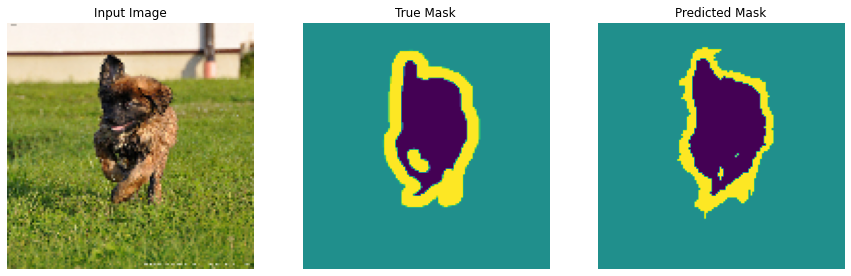

2/2 [==============================] - 4s 1s/step


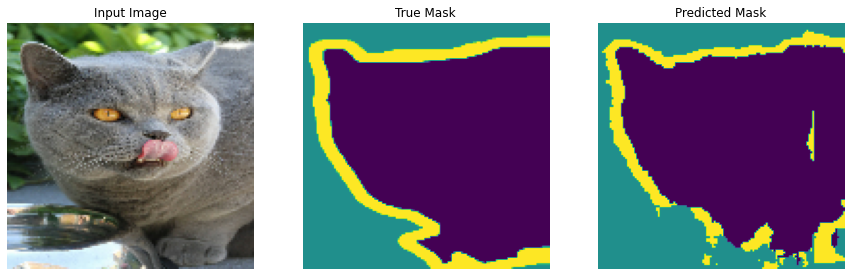

2/2 [==============================] - 3s 1s/step


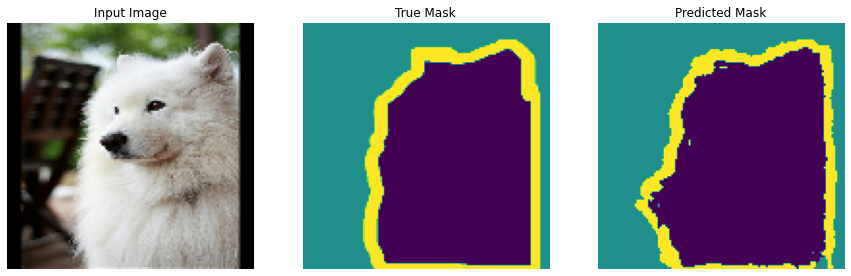

In [151]:
show_predictions(test_batches, 3)

Nous constatons que les masques prédits sont très conformes à l'image de base si l'on compare par rapport au vrai masque de l'image.